In [1]:
import pandas as pd
marketing_dataset = pd.read_csv('marketing_data.csv')
print(marketing_dataset.head())
import numpy as np

   TV      Radio  Social Media Influencer       Sales
0  33  22.703382      2.302986       Mega  118.874049
1  91  28.080056      6.062589      Macro  322.373949
2  68  19.535548      2.056270      Micro  245.082818
3  52  13.560663      2.669573       Nano  187.774044
4  34   7.110267      3.588867       Mega  119.843771


In [2]:
marketing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   int64  
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 177.7+ KB


In [3]:
marketing_dataset["Influencer"].value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

In [4]:
marketing_dataset=pd.get_dummies(marketing_dataset,columns=["Influencer"])
marketing_dataset.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,33,22.703382,2.302986,118.874049,0,1,0,0
1,91,28.080056,6.062589,322.373949,1,0,0,0
2,68,19.535548,2.056270,245.082818,0,0,1,0
3,52,13.560663,2.669573,187.774044,0,0,0,1
4,34,7.110267,3.588867,119.843771,0,1,0,0


In [6]:
response=marketing_dataset["Sales"]
predictors=marketing_dataset[["TV","Radio","Social Media", "Influencer_Macro", "Influencer_Mega", "Influencer_Micro",
                            "Influencer_Nano"]]

<AxesSubplot:>

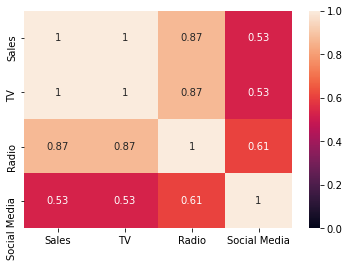

In [7]:
import seaborn as sns
# Excluyo las dummy variables ya que son categoricas
correlation_matrix=marketing_dataset[["Sales", "TV", "Radio", "Social Media"]].corr()
correlation_matrix
sns.heatmap(correlation_matrix,vmin=0.0,vmax=1.0,annot=True) 

In [8]:
predictors=marketing_dataset[["TV","Social Media", "Influencer_Macro", "Influencer_Mega", "Influencer_Micro",
                            "Influencer_Nano"]]

In [9]:
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

<AxesSubplot:>

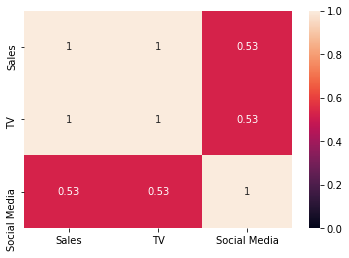

In [10]:
# En caso de haber multiple relacion lineal (>|0.8|) tendremos que excluir la variable ya que es un valor duplicado
# En este caso sacamos 'Radio'
correlation_matrix=marketing_dataset[["Sales", "TV", "Social Media"]].corr()
correlation_matrix
sns.heatmap(correlation_matrix,vmin=0.0,vmax=1.0,annot=True)

In [11]:
# Evaluo mi modelo
import sklearn.linear_model as skl
linear_regression=skl.LinearRegression()
modelo = linear_regression.fit(predictors_train,response_train)

In [12]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[ 3.56178585 -0.0152527   0.11052927 -0.03381378 -0.01162365 -0.06509185]
-0.05554964175999544


In [13]:
entrada = [[68,2.056, 0, 0, 1, 0]]
modelo.predict(entrada)

array([242.10290473])

In [14]:
entrada = [[10,3.88, 1, 0, 0, 0]]
modelo.predict(entrada)

array([35.61365763])

In [5]:
marketing_dataset[marketing_dataset["Sales"] < 36].head(10)
# Para comparar el output de mi modelo

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
132,10,6.145248,1.591116,32.566825,1,0,0,0
282,10,2.112089,2.920709,32.237030,0,1,0,0
369,10,5.825167,0.105715,33.929084,1,0,0,0
590,10,4.693663,2.156241,34.566790,1,0,0,0
788,10,12.201230,2.452275,34.113962,1,0,0,0
859,10,6.492419,1.307754,34.046359,0,0,1,0
1123,11,7.374948,3.609159,33.980000,0,0,0,1
1233,10,1.179967,0.939789,34.205170,0,1,0,0
1516,11,8.231312,0.304836,35.637970,0,1,0,0
1640,10,0.573244,1.072542,33.719607,0,0,1,0


In [15]:
#TV      Radio  Social Media Influencer       Sales
rating_TV=int(input("Ingrese rating de TV: "))
rating_social=float(input("Ingrese rating en redes sociales: "))
influencer=input("Ingrese el nombre del media influencer: ")

Ingrese rating de TV: 10
Ingrese rating en redes sociales: 3.88
Ingrese el nombre del media influencer: Nano


In [16]:
entrada = [[rating_TV,rating_social, 0, 0, 0, 0]]

if influencer == "Macro":
    entrada[0][2] = 1
elif influencer == "Mega":
    entrada[0][3] = 1
elif influencer == "Micro":
    entrada[0][4] = 1
else:
    entrada[0][5] = 1
    
modelo.predict(entrada)

array([35.43803651])

In [17]:
r_squared=linear_regression.score(predictors,response)
r_squared

0.9989944623800291

In [18]:
# Residuals margen de error
response_predictions=linear_regression.predict(predictors)
residuals=response-response_predictions
print(residuals.mean())
residuals.std()

-0.04023809556047421


2.949405483453455

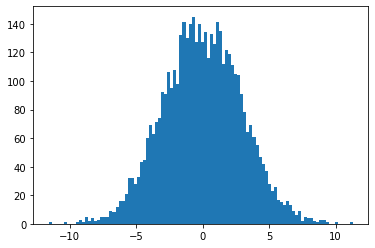

In [19]:
import matplotlib.pyplot as plt
plt.hist(residuals,bins=100)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

y_pred=modelo.predict(predictors_test)
mse=mean_squared_error(response_test,y_pred)
print(mse)

9.100515517041677


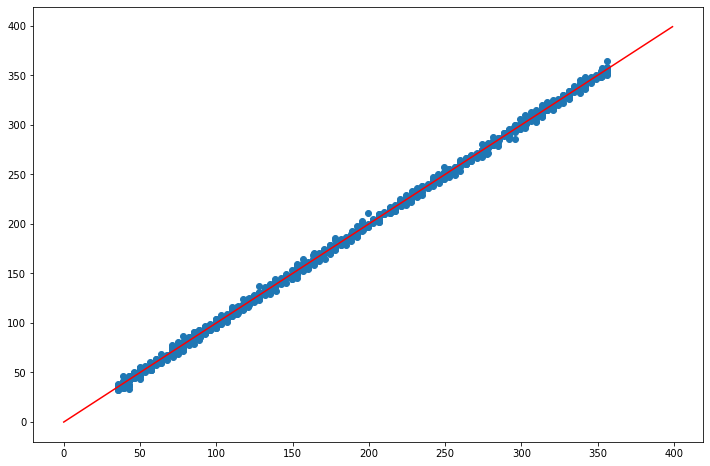

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(y_pred, response_test)
plt.plot(range(0,400), range(0,400), c="red")